<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/unfreez_cbam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import cv2
import os
import pandas as pd

In [17]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [18]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [19]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

path = train_dir
k = 0
print ('Loading data set...')
k=1
for i in os.listdir(path):
  #print(i)
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  #print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(300,300))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)

Loading data set...


In [20]:
def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel

In [21]:
y = np.asarray(y_age)
gender = np.asarray(y_gender)
x=np.asarray(X_train, dtype=np.float32)
x/255
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(0)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
print (y_final[:50])
print (gender_final[:50])
k = 10 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
y_train = softlabel(y_train,240)
y_valid = softlabel(y_valid,240)
y_test = softlabel(y_test,240)
print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))


[126 149 113 132 156 180 156  42 126 126  42  30  78 174  88 165  32 132
 156  82 192 170  94  32 156 120  60  33 126  54  27 108  94 162 120  21
 188  33 136  24   4  12 132  36  57  24  90 138 138 159]
[ 1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.
  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.]
[[0.   0.   0.   ... 0.1  0.08 0.06]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.02 0.04 ... 0.   0.   0.  ]
 [0.52 0.54 0.56 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
x_train shape:(51, 300, 300, 3)
y_train shape:(51, 240)
gender_train shape:(51,)
x_valid shape:(10, 300, 300, 3)
y_valid shape:(10, 240)
gender_valid shape:(10,)
x_test shape:(10, 300, 300, 3)
y_test shape:(10, 240)


In [25]:
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 14.5 MB/s 
     |████████████████████████████████| 116 kB 57.5 MB/s 
     |████████████████████████████████| 663 kB 70.1 MB/s 
     |████████████████████████████████| 109 kB 72.5 MB/s 
     |████████████████████████████████| 115 kB 71.9 MB/s 
     |████████████████████████████████| 978 kB 63.6 MB/s 
     |████████████████████████████████| 966 kB 65.7 MB/s 
     |████████████████████████████████| 2.2 MB 61.3 MB/s 
     |████████████████████████████████| 500 kB 68.2 MB/s 
     |████████████████████████████████| 1.0 MB 65.3 MB/s 
     |████████████████████████████████| 107 kB 71.7 MB/s 
     |████████████████████████████████| 40 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.8 MB/s 
     |████████████████████████████████| 98 kB 9.7 MB/s 
     |████████████████████████████████| 212 kB 70.7 MB/s 
  Created wheel for PyOpenGL: filen

In [26]:
from visualization import *
import numpy as np
import cv2
from keras import backend as K
from keras.preprocessing import image
import os


def ShowAttentionV1(model,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        print (filename)
        filepath=image_path+filename
        image=load_image(filepath)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        layer=K.function([model.layers[0].input],[model.layers[196].output])
        FeatureMap=layer([image,gender])[0]
        print (FeatureMap.shape)
        FeatureMap = np.squeeze(FeatureMap, axis=0)
        FeatureMap = np.abs(FeatureMap)
        heatmap = np.mean(FeatureMap,axis=2)
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')




def GAPAttention(model,weights,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        filepath=image_path+filename
        print (filepath)
        image=load_image(filepath)
        print("gpa")
        print(image.shape)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        print("ok")
        layer=K.function([model.layers[0].input],[model.layers[1].get_output_at(-1),model.layers[-1].output])
        print("ok_1")
        GAP,prediction=layer([image])
        print("ok_2")
        GAP=np.squeeze(GAP,axis=0)
        print("ok_3")
        print (GAP.shape)
        print("ok_4")
        index = np.argmax(prediction)
        print("ok_5")
        print (index)
       # weight = weights[:,index]
        weight =np.mean(weights[:,index-5:index+5],axis=1)
        heatmap = np.zeros((GAP.shape[0],GAP.shape[1]))
        for k in range(GAP.shape[2]):
            heatmap = heatmap + weight[k]*GAP[:,:,k]
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')



def SaveImg(filename,filepath,heatmap):
    img = cv2.imread(filepath)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    AttentionImg =0.5* heatmap + img
    cv2.imwrite('/content/heat'+filename,heatmap)
    cv2.imwrite('/content/attention'+filename,AttentionImg)


def load_image(path):
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.resize(img,(300,300))
    print(img.shape)
    x = np.asarray(img, dtype=np.float32)
   # img = image.load_img(path, target_size=(448, 448))
   # print (img.shape)
   # x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

def TestMAE(model,test_data,test_label,test_gender):
    test_gender = np.array(test_gender)
    test_gender = np.expand_dims(test_gender,axis=1)
    layer=K.function([model.layers[0].input,model.layers[3].input],[model.layers[-1].output])
    predictions=layer([test_data,test_gender])
    predictions = np.array(predictions)
    predictions = np.squeeze(predictions,axis=0)
    print (predictions.shape)
    predict_label = np.argmax(predictions,axis=1)
    test_label = np.argmax(test_label,axis=1)
    print (predict_label)
    print (test_label)
    TestMAE = np.mean(np.abs(predict_label-test_label))
    return TestMAE



def DataAugment(x_train):
    x_train_Aug = np.zeros(x_train.shape)
    for i in range(x_train.shape[0]):
        for j in range(3):
            img = x_train[i,:,:,j]
            img = RandomMask(img)
            img = RandomMask(img)
            if np.random.random()>-1:
                x_train_Aug[i,:,:,j]=img 
            else:
                x_train_Aug[i,:,:,j]=x_train[i,:,:,j]
    return x_train_Aug


def RandomMask(img):
    m,n=img.shape
    m=int(m/6)
    n=int(n/6)
    i,j = np.random.randint(0,6,2)
    img[i*m:(i+1)*m,j*n:(j+1)*n]=np.random.random()
    return img



In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 32
epochs = 30

In [28]:
base_model11 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [29]:
base_model11.trainable = True
print("Number of layers in the base model: ", len(base_model11.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model11.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [52]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale


In [55]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [64]:
input11 = Input(shape=(300,300,3),name='input1')
input_gender11 = Input(shape=(1,),dtype='float32',name='input2')
output11 = base_model11(input11)
gender_embedding11=Dense(16)(input_gender11)
print (K.int_shape(output11))
x11=channel_attention(output11)
print (K.int_shape(x11))
x11=spatial_attention(x11)
print (K.int_shape(x11))
x11 = keras.layers.MaxPooling2D(pool_size=(8,8))(x11)
print (K.int_shape(x11))
x11=Flatten()(x11)
f11 = keras.layers.Concatenate(axis=1)([x11,gender_embedding11])
print (K.int_shape(f11)) 
#x = Dense(256, activation='relu')(x)
prediction11 = Dense(240)(x11)

model11 = Model(inputs=[input11,input_gender11], outputs=prediction11)
for i,layer in enumerate(model11.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model11.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 1, 1, 2048)
(None, 2064)
0 input1
1 resnet50
2 tf.math.reduce_mean_13
3 tf.math.reduce_max_6
4 dense_32
5 dense_34
6 dense_33
7 dense_35
8 tf.__operators__.add_4
9 tf.math.sigmoid_6
10 tf.math.multiply_6
11 tf.math.reduce_mean_14
12 tf.math.reduce_max_7
13 tf.concat_2
14 conv2d_2
15 tf.math.sigmoid_7
16 tf.math.multiply_7
17 max_pooling2d_3
18 flatten_3
19 input2
20 dense_36


In [65]:
len(model11.trainable_variables)

101

In [66]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history11=model11.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 2/100
2/2 [==============================] - 1s 300ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 3/100
2/2 [==============================] - 1s 295ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2052 - val_MAE: 0.2052
Epoch 4/100
2/2 [==============================] - 1s 293ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 5/100
2/2 [==============================] - 1s 294ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 6/100
2/2 [==============================] - 1s 295ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2052 - val_MAE: 0.2052
Epoch 7/100
2/2 [==============================] - 1s 375ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2052 - val_MAE: 0.2052
Epoch 8/100
2/2 [==============================] - 1s 294ms/step - loss: 0.2012 - MAE:

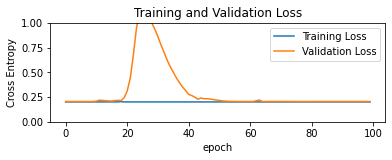

In [67]:
loss = history11.history['loss']
val_loss = history11.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [60]:
model11.summary


<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f10ae22f210>>

In [71]:
input11 = Input(shape=(300,300,3),name='input1')
input_gender11 = Input(shape=(1,),dtype='float32',name='input2')
output11 = base_model11(input11)
gender_embedding11=Dense(16)(input_gender11)
print (K.int_shape(output11))
x11=channel_attention(output11)
print (K.int_shape(x11))
#x11=spatial_attention(x11)
#print (K.int_shape(x11))
x11 = keras.layers.MaxPooling2D(pool_size=(8,8))(x11)
print (K.int_shape(x11))
x11=Flatten()(x11)
f11 = keras.layers.Concatenate(axis=1)([x11,gender_embedding11])
print (K.int_shape(f11)) 
#x = Dense(256, activation='relu')(x)
prediction11 = Dense(240)(x11)

model12 = Model(inputs=[input11,input_gender11], outputs=prediction11)
for i,layer in enumerate(model11.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model12.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 1, 1, 2048)
(None, 2064)
0 input1
1 resnet50
2 tf.math.reduce_mean_13
3 tf.math.reduce_max_6
4 dense_32
5 dense_34
6 dense_33
7 dense_35
8 tf.__operators__.add_4
9 tf.math.sigmoid_6
10 tf.math.multiply_6
11 tf.math.reduce_mean_14
12 tf.math.reduce_max_7
13 tf.concat_2
14 conv2d_2
15 tf.math.sigmoid_7
16 tf.math.multiply_7
17 max_pooling2d_3
18 flatten_3
19 input2
20 dense_36


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [72]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history12=model12.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2497 - val_MAE: 0.2497
Epoch 2/100
2/2 [==============================] - 1s 286ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2445 - val_MAE: 0.2445
Epoch 3/100
2/2 [==============================] - 1s 286ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2398 - val_MAE: 0.2398
Epoch 4/100
2/2 [==============================] - 1s 289ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2359 - val_MAE: 0.2359
Epoch 5/100
2/2 [==============================] - 1s 292ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2325 - val_MAE: 0.2325
Epoch 6/100
2/2 [==============================] - 1s 312ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2293 - val_MAE: 0.2293
Epoch 7/100
2/2 [==============================] - 1s 312ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2265 - val_MAE: 0.2265
Epoch 8/100
2/2 [==============================] - 1s 286ms/step - loss: 0.2012 - MAE:

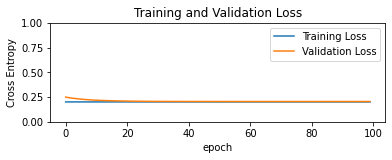

In [73]:
loss = history12.history['loss']
val_loss = history12.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [75]:
input11 = Input(shape=(300,300,3),name='input1')
input_gender11 = Input(shape=(1,),dtype='float32',name='input2')
output11 = base_model11(input11)
gender_embedding11=Dense(16)(input_gender11)
print (K.int_shape(output11))
#x11=channel_attention(output11)
#print (K.int_shape(x11))
x11=spatial_attention(output11)
print (K.int_shape(x11))
x11 = keras.layers.MaxPooling2D(pool_size=(8,8))(x11)
print (K.int_shape(x11))
x11=Flatten()(x11)
f11 = keras.layers.Concatenate(axis=1)([x11,gender_embedding11])
print (K.int_shape(f11)) 
#x = Dense(256, activation='relu')(x)
prediction11 = Dense(240)(x11)

model13 = Model(inputs=[input11,input_gender11], outputs=prediction11)
for i,layer in enumerate(model11.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model13.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 1, 1, 2048)
(None, 2064)
0 input1
1 resnet50
2 tf.math.reduce_mean_13
3 tf.math.reduce_max_6
4 dense_32
5 dense_34
6 dense_33
7 dense_35
8 tf.__operators__.add_4
9 tf.math.sigmoid_6
10 tf.math.multiply_6
11 tf.math.reduce_mean_14
12 tf.math.reduce_max_7
13 tf.concat_2
14 conv2d_2
15 tf.math.sigmoid_7
16 tf.math.multiply_7
17 max_pooling2d_3
18 flatten_3
19 input2
20 dense_36


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [76]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history13=model13.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 2/100
2/2 [==============================] - 1s 284ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 3/100
2/2 [==============================] - 1s 288ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 4/100
2/2 [==============================] - 1s 293ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 5/100
2/2 [==============================] - 1s 287ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 6/100
2/2 [==============================] - 1s 289ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 7/100
2/2 [==============================] - 1s 293ms/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.2053 - val_MAE: 0.2053
Epoch 8/100
2/2 [==============================] - 1s 289ms/step - loss: 0.2012 - MAE:

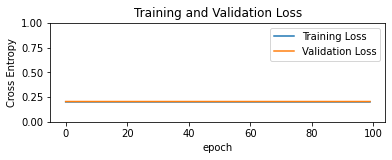

In [77]:
loss = history13.history['loss']
val_loss = history13.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()